In [91]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [92]:
# Load the data files 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load, encoding="UTF-8")
ride_data = pd.read_csv(ride_data_to_load, encoding="UTF-8")

# Combine the data into a single dataset by rule based on ride_data
city_ride_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

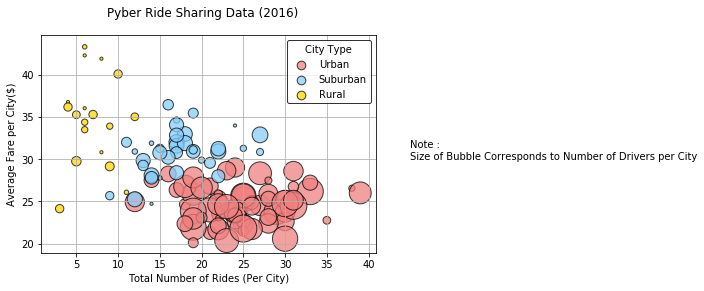

In [93]:
# Build the scatter plots for each city types

#group the merged data by city
city_group = city_ride_data.groupby("city")

#calculate the average fare, number of rides & number of drivers
city_avg_fare = city_group["fare"].mean()
city_total_rides = city_group["ride_id"].count()
city_drivers = city_group["driver_count"].mean()

#set index to city type
city_type = city_data.set_index("city")["type"]

#create data frame based on values calculated 
city_info = pd.DataFrame({"Number of Rides": city_total_rides,
                          "Average Fare": city_avg_fare,
                          "Number of Drivers": city_drivers,
                          "Type of City": city_type})

#sorting the data
city_info.sort_values('Number of Drivers', ascending = False)

#setting the colors
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

#setting the city type data
rural_type= city_info[city_info['Type of City'] == 'Rural']
suburban_type = city_info[city_info['Type of City'] == 'Suburban']
urban_type = city_info[city_info['Type of City'] == 'Urban']

#creating Color Dictionary 
city_color = {'Rural_type': color_scheme['Gold'], 
              'Suburban_type': color_scheme['Light Sky Blue'], 
              'Urban_type': color_scheme['Light Coral']}

# preparing three scatter plots for each city type
#city - type -> urban
plt.scatter(urban_type['Number of Rides'], 
            urban_type['Average Fare'], 
            s = urban_type['Number of Drivers']*10, 
            color = city_color['Urban_type'], 
            edgecolor = 'black', 
            label = 'Urban', 
            alpha = .75)

#city - type -> suburban
plt.scatter(suburban_type['Number of Rides'], 
            suburban_type['Average Fare'], 
            s = suburban_type['Number of Drivers']*10, 
            color = city_color['Suburban_type'], 
            edgecolor = 'black', 
            label = 'Suburban', 
            alpha = .75)

#city - type -> rural
plt.scatter(rural_type['Number of Rides'], rural_type['Average Fare'], 
            s = rural_type['Number of Drivers']*10, 
            color = city_color['Rural_type'], 
            edgecolor = 'black', 
            label = 'Rural', 
            alpha = .75)

#setting the scatter plot properties
plt.suptitle('Pyber Ride Sharing Data (2016)')
plt.text(45,30,'Note :\nSize of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare per City($)')
plt.grid()

# Create a legend
graph_legnd = plt.legend(frameon = True, title = "City Type", edgecolor = 'black')
graph_legnd.legendHandles[0]._sizes = [75]
graph_legnd.legendHandles[1]._sizes = [75]
graph_legnd.legendHandles[2]._sizes = [75]

# Save & show the scatter graph
plt.savefig("Pyber_Ride_sharing_data.png")
plt.show()

## Total Fares by City Type

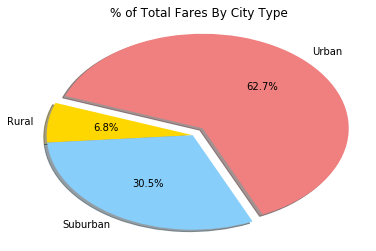

In [94]:
# Create Pie Chart for total fares per city type

#calculate total fares per city type
city_total_fare = city_ride_data.groupby(['type'])['fare'].sum()

# setting Labels for the sections of our pie chart
pie_labels = ["Rural","Suburban","Urban" ]

# setting the colors of each section of the pie chart
pie_colors = ["gold","lightskyblue","lightcoral"]

#setting the pie graph gaps between objects 
explode = (0, 0, 0.1)

#setting the pie chart properties
plt.title("% of Total Fares By City Type")
plt.pie(city_total_fare, explode=explode, labels=pie_labels, colors=pie_colors, 
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("auto")

#save and show the pie
plt.savefig("Total_Fares_By_City_Types.png")
plt.show()


## Total Rides by City Type

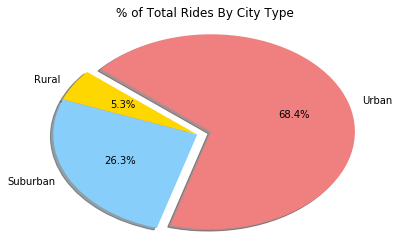

In [95]:
# Create pie chart for total rides per city type

#calculate the total rides per city type
city_total_rides = city_ride_data.groupby(['type'])['ride_id'].count()

# setting the pie labels
city_labels = ["Rural","Suburban","Urban"]

# setting the colors of each section of the pie chart
city_colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Type")
plt.pie(city_total_rides, explode=explode, labels=city_labels, colors=city_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("auto")

#save and show the pie chart
plt.savefig("Total_Rides_By_City_Types.png")
plt.show()

## Total Drivers by City Type

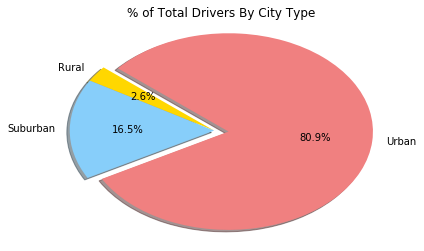

In [96]:
# Create pie chart for total drivers per city type

#calculate the total drivers per city type
city_total_drivers = city_data.groupby(['type'])['driver_count'].sum()

# setting pie labels
city_labels = ["Rural","Suburban","Urban" ]

# setting properties for pie
city_colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Type")
plt.pie(city_total_drivers, explode=explode, labels=city_labels, colors=city_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("auto")

#save and show pie chart
plt.savefig("Total_Drivers_By_City_Type.png")
plt.show()